In [34]:
import sys
import cv2
import numpy as np
import random
import pytesseract

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.figure(figsize=(12,12))
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

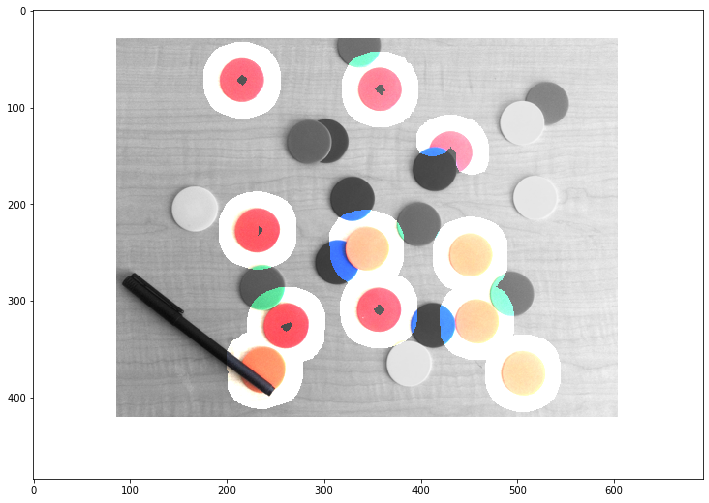

In [42]:
image = cv2.imread('detectcirclesexample.png')

def red_detector(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red = (-10,100, 100)
    upper_red = (10, 255, 255)

    mask = cv2.inRange(hsv, lower_red, upper_red)
    mask = cv2.GaussianBlur(mask, (9, 9), 9)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    mask = cv2.dilate(mask, kernel, iterations=1)
    
    red_object = cv2.bitwise_and(image, image, mask=mask)

    dst = cv2.addWeighted(gray, 0.5, red_object, 1.0, 0.0)
    
    return dst
    
red_detector(image)
# imshow('',red_object)
# imshow('',gray)
imshow('',dst)

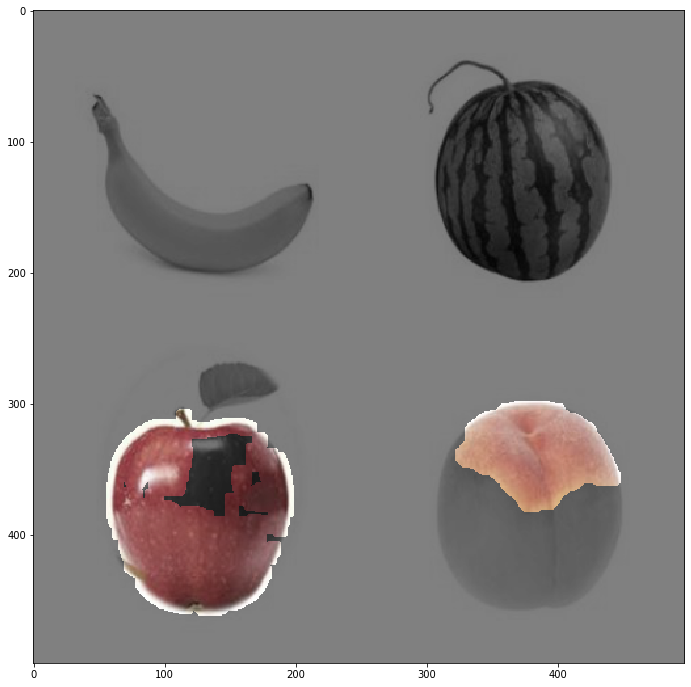

In [44]:
image = cv2.imread('../008_computer_vision/fruits.png')

dst = red_detector(image)
imshow('',dst)